# Preparação

In [1]:
# Importações das bibliotecas

import pandas as pd
import seaborn as srn
import statistics as sts


In [2]:
# importando dados
dataset = pd.read_csv('dados/Churn.csv', sep=';')

dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
#Tamanho do datatset
dataset.shape

(999, 12)

In [4]:
# Dando nome as colunas
dataset.columns = [
    'id', 
    'Score',
    'Estado',
    'Genero',
    'Idade',
    'Patrimonio',
    'Saldo',
    'Produtos',
    'TemCartaoDeCredito',
    'Ativo',
    'Salario',
    'Saiu',
]

In [5]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Exploração de dados

In [6]:
# Explorar dados categoricos - Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado


Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

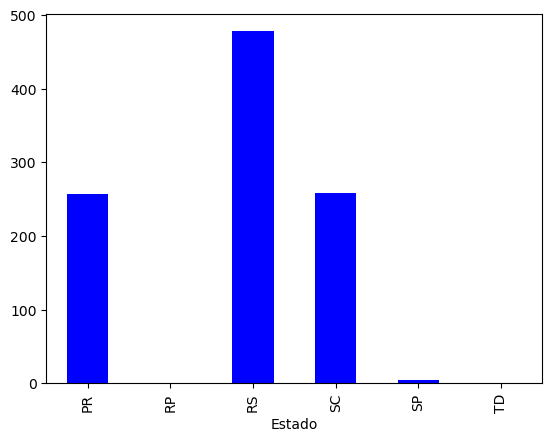

In [7]:
agrupado.plot.bar(color='blue')

In [8]:
agrupado_genero = dataset.groupby(['Genero']).size()
agrupado_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

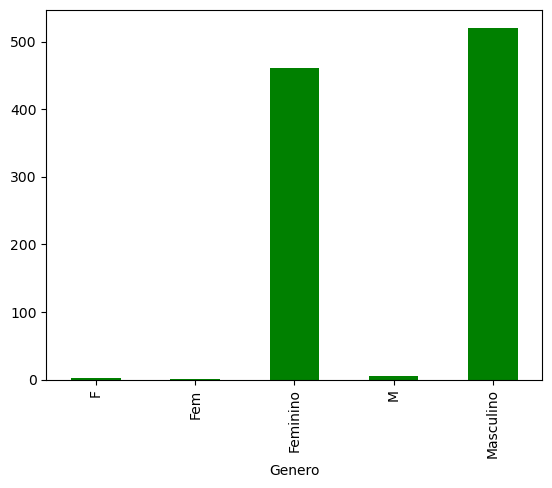

In [9]:
agrupado_genero.plot.bar(color='green')

In [10]:
 # Score
dataset['Score'].describe()
    
   

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


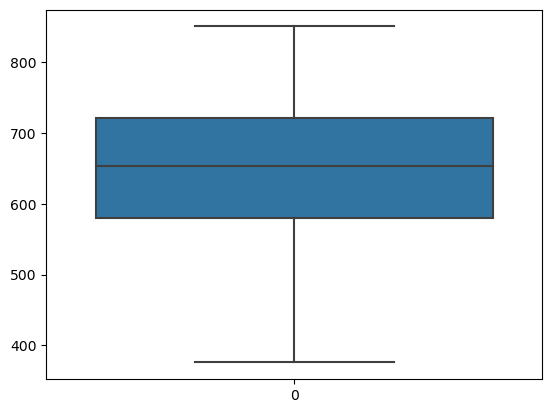

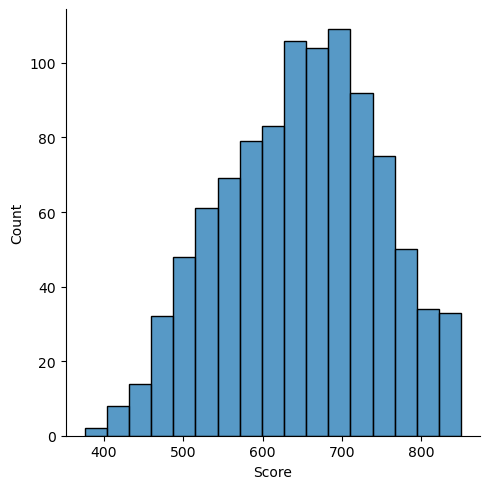

In [11]:
srn.boxplot(dataset['Score'])
srn.displot(dataset['Score'])

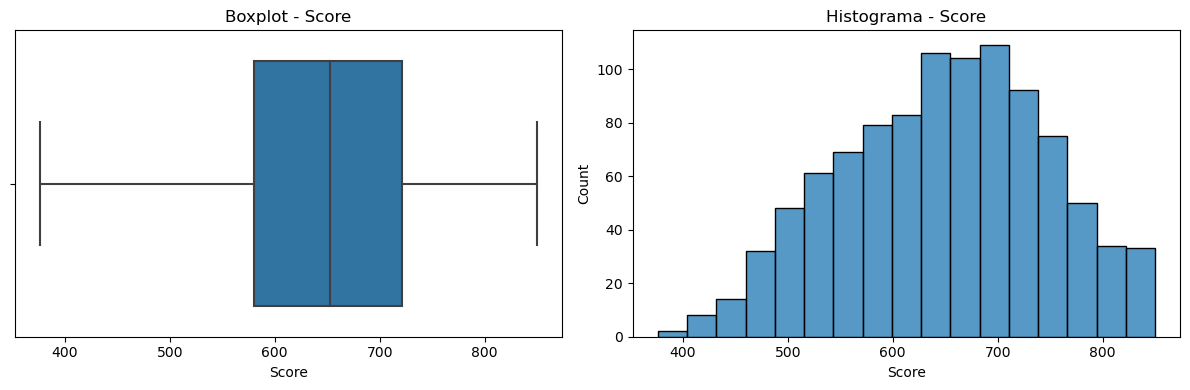

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Criação de uma figura e eixos compartilhados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotando o boxplot no primeiro conjunto de eixos
sns.boxplot(x=dataset['Score'], ax=ax1)
ax1.set_title('Boxplot - Score')

# Plotando o histograma no segundo conjunto de eixos
sns.histplot(x=dataset['Score'], ax=ax2)
ax2.set_title('Histograma - Score')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

# Exibindo a figura
plt.show()

In [13]:
# Idade 
dataset['Idade'].describe()


count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

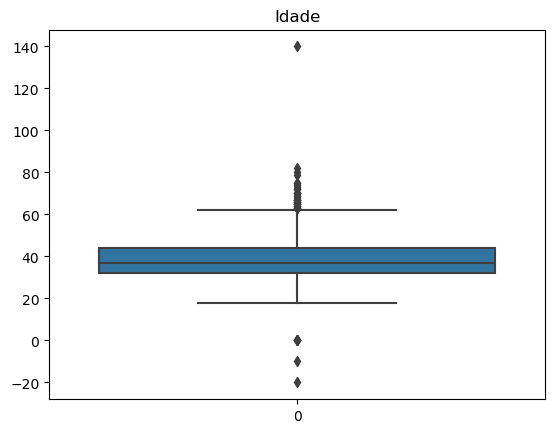

In [14]:
srn.boxplot(dataset['Idade']).set_title('Idade')
plt.show()

In [15]:
# Saldo
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


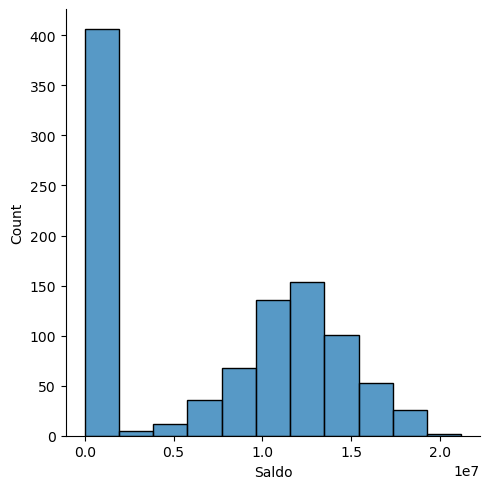

In [16]:
srn.displot(dataset['Saldo'])
plt.show()

In [17]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


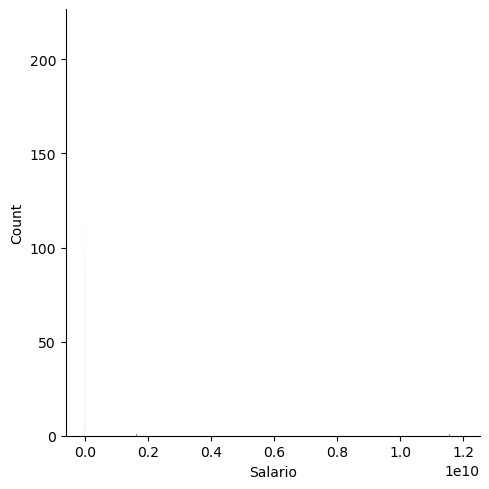

In [18]:
srn.displot(dataset['Salario'])
plt.show()

In [19]:
# Contamos os valores NAN
# Usado para saber se existe valores nulo no dataset
dataset.isnull().sum()

id                    0
Score                 0
Estado                0
Genero                8
Idade                 0
Patrimonio            0
Saldo                 0
Produtos              0
TemCartaoDeCredito    0
Ativo                 0
Salario               7
Saiu                  0
dtype: int64

# Tratamento de Dados - Sálario

In [20]:
# Removendo os sálarios NAN e colocando a mediana
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [21]:
mediana_salario = sts.median(dataset['Salario'])
print(mediana_salario)

70518.0


In [22]:
# Realizando a susbtituição
dataset['Salario'].fillna(mediana_salario, inplace=True)

In [23]:
# Verificando se salario esta correto
dataset['Salario'].isnull().sum()

0

# Tratamento de Dados - Genero

In [24]:
# Alterando Genero
# Arrumando os valores que não estão padrão.
# E removendo os NAN
grupo_genero = dataset.groupby(['Genero']).size()
grupo_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [25]:
dataset['Genero'].isnull().sum()

# colocando os masculinos porque é amodal
dataset['Genero'].fillna('M', inplace=True)
dataset['Genero'].isnull().sum()

0

In [38]:
# Padronização
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['Fem', 'F']), 'Genero'] = 'Feminino'



In [27]:
grupo_genero = dataset.groupby(['Genero']).size()
grupo_genero

Genero
Feminino     464
Masculino    535
dtype: int64

# Tratamento de Dados - Idade

In [28]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [29]:
# Visualizando as idade fora do padrão'

dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [30]:
# Colocando a mediana
mediana_idade = sts.median(dataset['Idade'])
mediana_idade

37

In [31]:
# Substituindo
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120), 'Idade'] = mediana_idade

In [32]:
# Localizando
dataset.loc[(dataset['Idade'] < 0) | (dataset['Idade'] > 120)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu


# Dados duplicados

In [33]:
# Buscando dados duplicados pelo id
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [35]:
# Excluíndo por id
dataset.drop_duplicates(subset='id', keep='first', inplace=True)
dataset[dataset.duplicated(['id'], keep=False)]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu


# Arrumando estados


In [37]:
grupo_estados = dataset.groupby(['Estado']).size()
grupo_estados

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [40]:
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'

In [44]:
grupo_estados

Estado
PR    257
RS    483
SC    258
dtype: int64

# Tratando Sálarios

In [46]:
desvio_padrao = sts.stdev(dataset['Salario'])
desvio_padrao

528988918.4679201

In [47]:
# Buscar Saálrio duas vezes maiores que o desvio padrão
dataset.loc[dataset['Salario'] >= 2 * desvio_padrao]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [49]:
# atualizar com a mediana
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [50]:
# atribuindo
dataset.loc[dataset['Salario'] >= 2 * desvio_padrao, 'Salario'] = mediana
#buscar novamente
dataset.loc[dataset['Salario'] >= 2 * desvio_padrao]

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu


In [51]:
dataset.head()

,id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoDeCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [52]:
dataset.shape


(998, 12)